# IMPORTATIONS

## Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid', {'legend.frameon':True})

## Datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#gender = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/gender_submission.csv")

# DATA EXPLORATION

### Data preparation

In [3]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Informations sur les colonnes

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(train)
'''
PAR COLONNES:
PassengerId: rien à signaler
Survived: vals(0,1) OK; sur 891 personnes, 342 mortes soit 38.4%
Pclass: vals(1,2,3) OK; Dans la Pclass=1 il y avait 216 personnes soit 24.2% (~ Pclass= 2 ou 3)
Name: sans intérêts apparents
Sex: vals(male,female) OK; 577 male sur 891 personnes soit 64.8% (~ female)
Age: vals_disctinct=89; MISSING = 20% = 177/891; Mean=29.7 (~ stats); histogramme à étudier
SibSp: vals(0,1,2,3,4,5,8) val(0).count()=608 soit 68.2% (~ vals); MISSING 68.2%
Parch: vals(0,1,2,3,4,5,6) val(0).count()=678 soit 76.1% (~ vals)
Ticket: vals_dictinct=681; 76.4% Unique
Fare: vals_dictinct=248; 27.8% Unique; ZEROS=1.7%; cf stats
Cabin: MISSING = 77.1% = 687/891
Embarked: vals(S, C, Q, 2missing); S.count() = 644 (~vals)

CORRELATIONS ENTRE LES COLONNES:
corr(Parch,SibSp) = 0.41
corr(Pclass,Fare) = -0.55
corr(Pclass,Survived), corr(Age, Pclass), corr(SibSp, Age) in [0.3, 0.4]
corr(Fare, survived) = 0.26; corr(Fare, Parch) = 0.22
   => corr(Fare, [Survived, Pclass, Parch])?
'''

C:\Users\Utilisateur\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.7 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


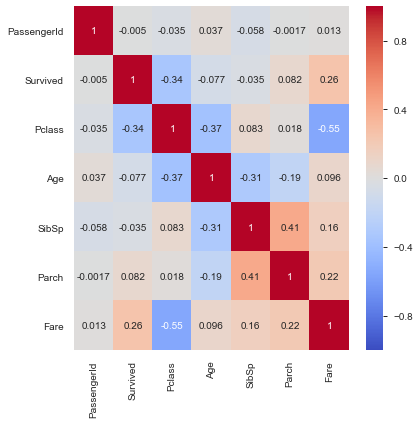

In [38]:
%matplotlib inline 
fig, ax = plt.subplots(figsize=(6,6))  
corr = train.corr()
ax =sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.tight_layout()
plt.show()
# TABLEAU SUR LES COEFFICIENTS DE CORRELATION: train.corr(method='pearson') # OU spearman

# DATA CLEANING

In [40]:
def cleaning(data):
    # Colonnes sans intérêt
    data = data.drop(["PassengerId", "Name", 'SibSp', 'Parch', "Cabin", "Ticket"], axis=1)
    # Création de la colonne Female (0,1) pour remplacer 'Sex'
    data['Female']=list(map(lambda x: int(x=='female'), data['Sex']))
    data = data.drop(["Sex"], axis=1)
    # Colonnes ayant des Nan et suppression des lignes correspondantes
    print('Les colonnes concernées sont:',data.columns[data.isna().any()].tolist()) 
    data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    # embarked transcrite sur le code touche clavier
    data['Embarked'] = [ord(i) for i in data['Embarked']] # compris entre 65 et 90
         # chr(code) pour retranscription
    return data
c_train = cleaning(train)
c_test = cleaning(test)
c_train. head()

Les colonnes concernées sont: ['Age', 'Embarked']
Les colonnes concernées sont: ['Age', 'Fare']


,Survived,Pclass,Age,Fare,Embarked,Female
0,0,3,22.0,7.2500,83,0
1,1,1,38.0,71.2833,67,1
2,1,3,26.0,7.9250,83,1
3,1,1,35.0,53.1000,83,1
4,0,3,35.0,8.0500,83,0


In [9]:
c_train.describe()

,Survived,Pclass,Age,Fare,Embarked,Female
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,34.567251,80.000000,0.363764
std,0.491139,0.836854,14.492933,52.938648,6.160534,0.481420
min,0.000000,1.000000,0.420000,0.000000,67.000000,0.000000
25%,0.000000,1.000000,20.000000,8.050000,83.000000,0.000000
50%,0.000000,2.000000,28.000000,15.645850,83.000000,0.000000
75%,1.000000,3.000000,38.000000,33.000000,83.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,83.000000,1.000000


# DATA EXPLORATION

#### Pour chacune des variables suivantes, créer un ou plusieurs diagrammes qui la résume au mieux.

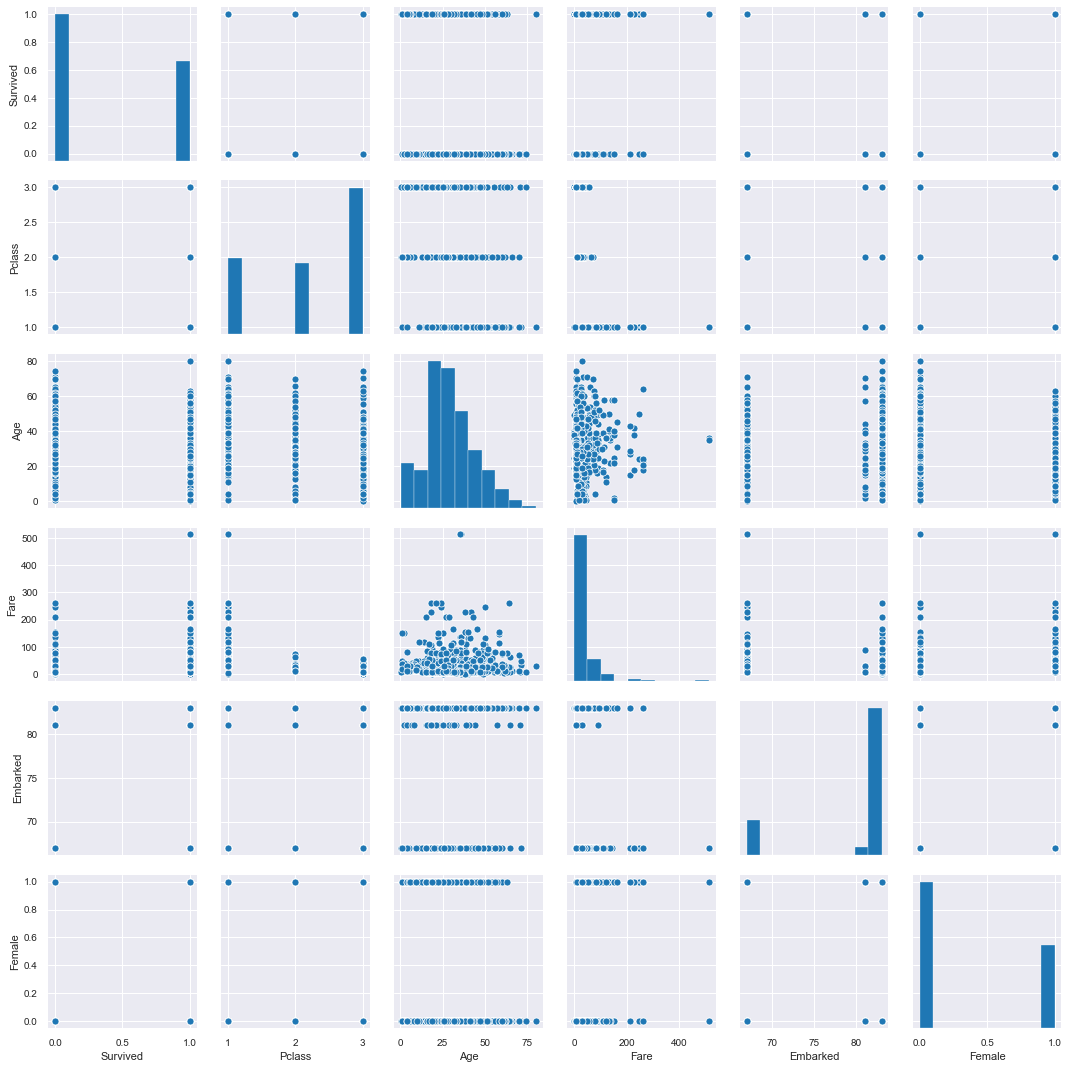

In [111]:
%matplotlib inline
# Etude des liens entre deux colonnes et la répartion des valeurs dans une colonne
sns.pairplot(c_train, palette="husl") # hue="species" NON ACCEPTE

"\nPour le(s)'entrée(s) C, les personnes le la première classe sont les plus concernées\nLa troisième classe se situe sur toutes les entrées, majoritaire sur les entrées S et omniprésente sur les entrées Q.\n"

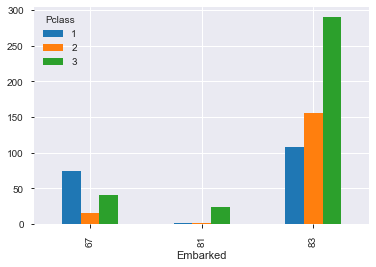

In [11]:
%matplotlib inline
# Répartion des différentes classes par entrées. CAHNGER NOMS ABSCISSES
pd.crosstab(c_train['Embarked'], c_train['Pclass']).plot.bar()
#c_train = c_train.drop('Embarked',axis=1)
'''
Pour le(s)'entrée(s) C, les personnes le la première classe sont les plus concernées
La troisième classe se situe sur toutes les entrées, majoritaire sur les entrées S et omniprésente sur les entrées Q.
'''

'\nLes tarifs du voyage sont majoritairements tournés entre 0 et 100.\n(50% ont un coût situé entre 8 et 33, cf c_train.describe())\n'

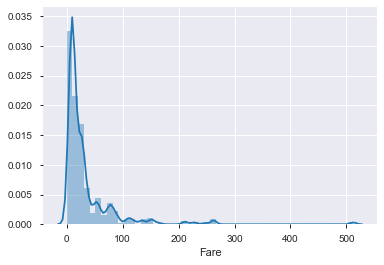

In [12]:
%matplotlib inline
# Les tarifs du voyage (nombre de persones par tarifs non pris en compte)
sns.distplot(c_train['Fare'])
'''
Les tarifs du voyage sont majoritairements tournés entre 0 et 100.
(50% ont un coût situé entre 8 et 33, cf c_train.describe())
'''

'\nLa majorité des femmes ont entre 15 et 40 ans.\nIl est etonnant que les femmes ayant moins de 10 ans soient sur un tarif plus élévé que la moyenne des tarifs pour les femmes agées entre 15 et 45 ans\n'

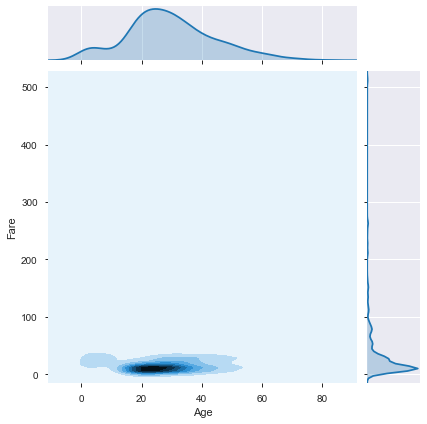

In [13]:
%matplotlib inline
# répartions entre les tarifs et les âges
sns.jointplot('Age','Fare', data=c_train, kind='kde')
'''
La majorité des femmes ont entre 15 et 40 ans.
Il est etonnant que les femmes ayant moins de 10 ans soient sur un tarif plus élévé que la moyenne des tarifs pour les femmes agées entre 15 et 45 ans
'''

In [14]:
%matplotlib inline
# Répartion des personnes par classes et age (representation 1/2)
#sns.carplot(x='Pclass',y='Age', data=c_train, hue='Female')

"\nOn constate que plus l'age est important, plus grandes sont les chances d'être dans une classe supérieure.\nUn homme a trés lègèrement plus de chances de se situé sur une classe supérieure qu'une femme.\n"

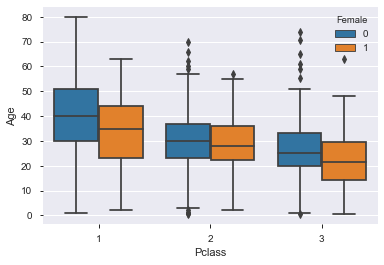

In [15]:
%matplotlib inline
# Répartion des personnes par classes et age (representation 2/2)
sns.boxplot(x='Pclass',y='Age', data=c_train, hue='Female')
'''
On constate que plus l'age est important, plus grandes sont les chances d'être dans une classe supérieure.
Un homme a trés lègèrement plus de chances de se situé sur une classe supérieure qu'une femme.
'''

"\nOn contate qu'il y a plus de personnes autour de 20-35 ans dans le Titanic. Ce qui est parfaitement valide.\nCependant, on trouve moins d'enfants autour de 10 ans que d'enfants issus de la naissance.\n"

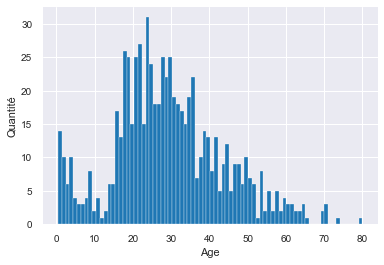

In [54]:
%matplotlib inline
# Nombre de personnes par age
plt.xlabel('Age')
plt.ylabel('Quantité')
rien = plt.hist(c_train['Age'].ravel(), bins=80) 
'''
On contate qu'il y a plus de personnes autour de 20-35 ans dans le Titanic. Ce qui est parfaitement valide.
Cependant, on trouve moins d'enfants autour de 10 ans que d'enfants issus de la naissance.
'''

"\nOn retrouve des constatations similaires à d'autres représentation montrants des liens entre la colonne Age et la colonne Pclass, \nelle-même en lien avec la colonne Fare.\n"

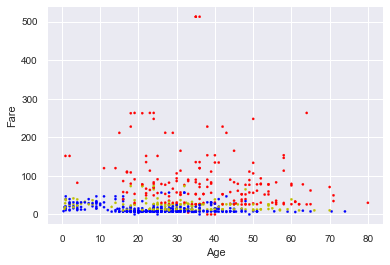

In [55]:
%matplotlib inline
# Répartition des classes suivant le coût des tickets et l'âge des personnes
f = lambda z: int(z==1)*'r' + int(z==2)*'y' + int(z==3)*'b'
X, Y, Z = c_train['Age'], c_train['Fare'], c_train['Pclass']
plt.scatter(X, Y, alpha=1, s=5, facecolor=list(map(f,Z)))
plt.xlabel('Age')
plt.ylabel('Fare')
'''
On retrouve des constatations similaires à d'autres représentation montrants des liens entre la colonne Age et la colonne Pclass, 
elle-même en lien avec la colonne Fare.
'''

C:\Users\Utilisateur\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


'\nLes lignes correspondent aux classes et les colonnes à la survie.\nMajoritairement, les personnes de la classe 3 sont décédées.\nPour la première classe, ils ont eus de la chance\n'

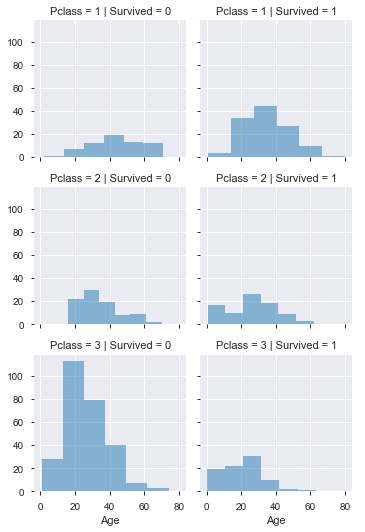

In [18]:
%matplotlib inline
# 
grid = sns.FacetGrid(c_train, col='Survived', row='Pclass', size=2.5, aspect=1)
grid.map(plt.hist, 'Age', alpha=.5, bins=c_train.shape[1])
grid.add_legend()
'''
Les lignes correspondent aux classes et les colonnes à la survie.
Majoritairement, les personnes de la classe 3 sont décédées.
Pour la première classe, ils ont eus de la chance
'''

"\nLes morts sont plus importanes chez les hommes que chez les femmes.\nIl y a moins de survivants que de morts. En admettant qu'il y a autant de femmes que d'hommes sur le bateau, les femmes ont plus de chances de survivre\n"

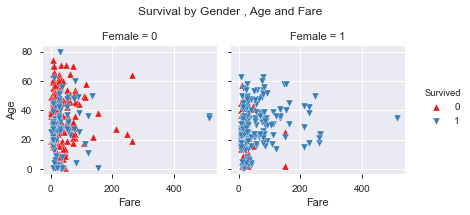

In [19]:
%matplotlib inline
# survie selon l'age, le prix et le sexe
g = sns.FacetGrid(c_train, hue="Survived", col="Female", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');
'''
Les morts sont plus importanes chez les hommes que chez les femmes.
Il y a moins de survivants que de morts. En admettant qu'il y a autant de femmes que d'hommes sur le bateau, les femmes ont plus de chances de survivre
'''

Il y a moins de survivants que de morts.
En admettant qu'il y a autant de femmes que d'hommes sur le bateau, les femmes ont plus de chances de survivre

In [56]:
# Nombre de suivivants ou non au naufrage
print("Not Survived :" ,len(c_train[c_train['Survived'] == 1]))
print("Survived :",len(c_train[c_train['Survived'] == 0]))
'''
Sur les données étudiées, on relève 288 morts et 424 survivants
'''

Not Survived : 288
Survived : 424


'\nSur les données étudiées, on relève 342 morts et 549 survivants\n'

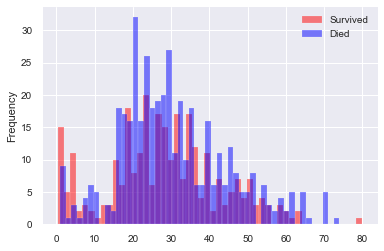

In [57]:
%matplotlib inline
# Répartion des personnes mortes ou survécues suivant leurs âges. A METTRE EN DESSOUS DE L AUTRE
survived = c_train[c_train["Survived"] == 1]
died = c_train[c_train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

"\nIl n'y a de vue aucun lien entre le sexe et Pclass.\nLes femmes ont plus de chances qu'un homme de survivre face au défi conséquent de la situation étudiée.\nLes hommes ont autour de 4 ans de plus en moyenne que les femmes.\n"

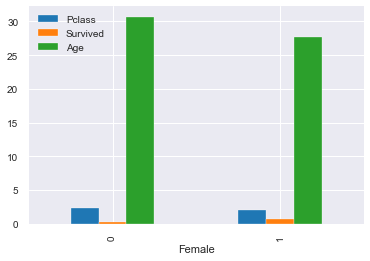

In [59]:
%matplotlib inline
# Catégories associées aux genres
c_train[['Female','Pclass','Survived','Age']].groupby(['Female']).mean().plot.bar()
'''
Il n'y a de vue aucun lien entre le sexe et Pclass.
Les femmes ont plus de chances qu'un homme de survivre face au défi conséquent de la situation étudiée.
Les hommes ont autour de 4 ans de plus en moyenne que les femmes.
'''

'\nDes liens déjà rencontrés existent entre la classe et, Survived ou Age\n'

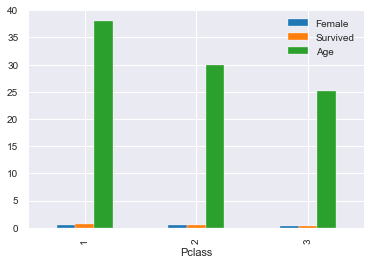

In [61]:
%matplotlib inline
# Caractéristiques des personnes dans les différentes classes
c_train[['Female','Pclass','Survived','Age']].groupby(['Pclass']).mean().plot.bar()
'''
Des liens déjà rencontrés existent entre la classe et, Survived ou Age
'''

In [62]:
%matplotlib inline
# Positionnement des enfants dans les différentes classes
print(c_train[c_train['Age']<18]['Pclass'].value_counts()/len(c_train[c_train['Age']<18]))
print(c_train[c_train['Age']>=18]['Pclass'].value_counts()/len(c_train[c_train['Age']>=18]))
'''
70% des enfants sont situés dans la troisième classe
'''

3    0.690265
2    0.203540
1    0.106195
Name: Pclass, dtype: float64
3    0.462437
1    0.287145
2    0.250417
Name: Pclass, dtype: float64


'\n70% des enfants sont situés dans la troisième classe\n'

# STATISTIC TEST

In [53]:
# NB: est dépendant = dépendance = a une influence = il existe une correlation (non proche de 0)

## Les femmes et les enfants d'abord.

#### Test d'hypothèse pour savoir si oui ou non, les enfants ont été privilégiés lors du naufrage.

In [63]:
import scipy.stats as stats
'''
Test Z: 
H0: la probabilité de mourrir est identique entre les enfants et les adultes.
'''
stat1 = pd.crosstab(np.array([int(i<18)*"Enfant" + int(i>=18)*"Adulte" for i in c_train['Age']]), c_train['Survived'])
#print("Tableau croisé sur la survie ou non des enfants ou adultes:\n", stat1)
qtt = stat1.sum(axis=1)
#print("Nombre d'adultes et d'enfants: \n: ",qtt)
stat1 = stat1[1]/stat1.sum(axis = 1)
#print("Probabilité pour les personnes de mourrir: \n", stat1)

# Le nombre d'adultes mort suit la loi de bernouilli(0.379, 599) 
# pouvant être approximée par la loi normale(0.379*599, sqrt(0.379*0.621*599))
# print(f"n_adultes = {qtt[0]}, p_a_meurt = {stat1[0]}, n_enfants = {qtt[1]}, p_e_meurt = {stat1[1]}")
mu0 = qtt[0]*stat1[0]; sig0 = np.sqrt(qtt[0]*stat1[0]*(1-stat1[0]))
mu1 = qtt[1]*stat1[1]; sig1 = np.sqrt(qtt[1]*stat1[1]*(1-stat1[1]))
n = 1000
alpha = .05

pval = 0
for i in range (1000) :
    law0 = np.random.normal(loc=mu0, scale=sig0, size=n)
    law1 = np.random.normal(loc=mu1, scale=sig1, size=n)
    pval += stats.ks_2samp(law0, law1)[1]  # stat.ttest_ind(s1,s2, equal_var=False)
      
pval = pval/1000 
if pval <= alpha :
    print("H0 est rejetée, le fait d'être un enfants ou un adulte a une influence significative sur les chances de mourrir.")
else :
    print("La probabilité de mourrir est identique entre les enfants et les adultes.")

H0 est rejetée, le fait d'être un enfants ou un adulte a une influence significative sur les chances de mourrir.


#### Test d'hypothèse pour savoir si oui ou non, les femmes ont été privilégiées lors du naufrage.

##### Avec Khi-deux

In [46]:
alpha = 0.05
col_etud = pd.crosstab(c_train['Female'],c_train['Survived'])
pval = stats.chi2_contingency(col_etud)[1]
if pval <= alpha:
    print("H0 est rejetée, le sexe d'un passager à une influence sur la survie au naufrage.")
else:
    print("Le sexe d'un passager n'a pas d'influence sur la survie au naufrage.")
# INFOS SUR LE TEST: https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2#Test_du_%CF%872_d%27ind%C3%A9pendance

H0 est rejetée, le sexe d'un passager à une influence sur la survie au naufrage.


##### Avec Fischer

In [64]:
alpha=0.05
col_etud2 = pd.crosstab(c_train['Female'],c_train['Survived'])
pval = stats.fisher_exact(col_etud2)[1]
if pval <= alpha:
    print("H0 est rejetée, le sexe d'un passager à une influence sur la survie au naufrage.")
else:
    print("Le sexe d'un passager n'a pas d'influence sur la survie au naufrage.")

H0 est rejetée, le sexe d'un passager à une influence sur la survie au naufrage.


## L'influence du prix du billet sur le survie des passagers

#### Test d'hypothèse pour savoir si oui ou non, le prix du billet a une influence sur la survie d'un passager.

##### Avec Khi-deux

In [ ]:
# Fakhredine 

##### Avec Fisher

In [157]:
# Fakhredine 

# CREATING MODELS 

In [75]:
# Création des dataFrames utiles pour prédire Survived
X_train = c_train.drop('Survived',axis=1)
y_train = c_train['Survived']
X_test = c_test

### LINEAR REGRESSION MODELS 

#### 1. Avec sklearn

In [127]:
from sklearn import linear_model
X = X_train
y = y_train
# On fit le modele
model = linear_model.LinearRegression()
results = model.fit(X, y)
# print(results.intercept_, results.coef_)

print("y = ", end='')
for i in [f"{results.coef_[i]} {X.columns[i]} + " for i in range(len(X.columns))]:
    print(i,end="") 
print(results.intercept_)
# INTERESSANT: http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/td2a_eco_regressions_lineaires.html

y = -0.1939985546063683 Pclass + -0.005391174160324465 Age + -4.835201437496771e-05 Fare + -0.004917467187459085 Embarked + 0.4749766446918334 Female + 1.2211788706369497


#### 2. Avec statsmodels.api

In [160]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.620
Model:                            OLS   Adj. R-squared (uncentered):              0.617
Method:                 Least Squares   F-statistic:                              230.6
Date:                Wed, 08 Apr 2020   Prob (F-statistic):                   7.48e-146
Time:                        15:37:39   Log-Likelihood:                         -343.67
No. Observations:                 712   AIC:                                      697.3
Df Residuals:                     707   BIC:                                      720.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### LOGISTICS MODELS 

#### Test 1: Avec une régression logistique

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


y_train:
 [0 1 1 1 0 0 0 1 1 1]
y_pred_prob[:,1] :
 [0.11535546 0.89335513 0.55817783 0.90448527 0.07984574 0.32147042
 0.20050192 0.55185626 0.84520727 0.71939449]


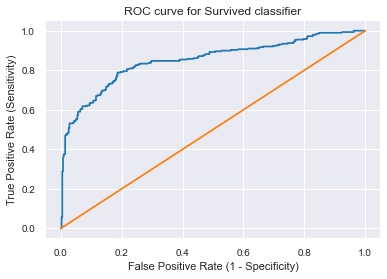

0.8501989976415094
0.7963483146067416


interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

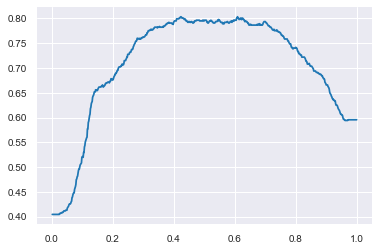

Les meilleures valeurs à prendre pour le soeuil sont dans [0.42275280898876405, 0.6081460674157303]


In [154]:
%matplotlib inline
sns.set_style('darkgrid', {'legend.frameon':True})

# Création des dataFrames utiles pour prédire Survived
X = X_train.copy()
y = y_train.copy()

# Entrainnement du modèle de regression logistique 
from sklearn.linear_model import LogisticRegression # OU LinearRegression
logreg1 = LogisticRegression() 
logreg1.fit(X, y)

# Etude des différences entre y_train et y_pred_prob
y_pred_prob = logreg1.predict_proba(X)
print('y_train:\n', y.values[:10])
print('y_pred_prob[:,1] :\n',y_pred_prob[:,1].T[:10])

# ROC curve associée à notre représentation
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_prob[:,1])
plt.plot(fpr, tpr, [0,1],[0,1])
plt.xlim([-0.05, 1.05]); plt.ylim([-0.05, 1.05])
plt.title('ROC curve for Survived classifier')
plt.xlabel('False Positive Rate (1 - Specificity)'); plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

# AUC score
print(metrics.roc_auc_score(y, y_pred_prob[:,1]))
# Use score method to get accuracy of model ()
print(logreg1.score(X, y))

# Etude de la valeur soeuil à prendre
import ipywidgets as widgets
from sklearn.preprocessing import binarize
def tests(x):    
    # predistions suivant la valeur soeuil prise
    y_pred_class = binarize([y_pred_prob[:,1]], x).T
    # print the first 25 true and predicted responses
    print('True:', y_train.values.T[:10])
    print('Pred:', y_pred_class.T[0,:10])
    # confusion matrix
    conf_matrix = metrics.confusion_matrix(y, y_pred_class)
    print(conf_matrix)
    # calculate accuracy
    print(metrics.accuracy_score(y, y_pred_class))
    print(metrics.roc_auc_score(y, y_pred_prob[:,1]))
    
widgets.interact(tests, x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))

# Etude de la meilleur valeur soeuil à prendre
def f(x):
    # predict diabetes if the predicted probability is greater than x
    y_pred_class = binarize([y_pred_prob[:,1]], x).T
    # calculate accuracy 
    return metrics.accuracy_score(y, y_pred_class) 

list_x = [i/len(y_pred_prob[:,1]) for i in range(1,len(y_pred_prob[:,1]))]
list_y = [f(i) for i in list_x]
plt.plot(list_x, list_y)
plt.show()
plt.close()

points = dict(zip(list_x, list_y))
val_soeuil = {x  for x, y in points.items() if y == max(points.values())}
print(f"Les meilleures valeurs à prendre pour le soeuil sont dans [{min(val_soeuil)}, {max(val_soeuil)}]")

#### Test 2: Avec le KNN

Le meilleur nombre de voisins est de  1
Le score obtenu sur le test est de: 0.9831460674157303


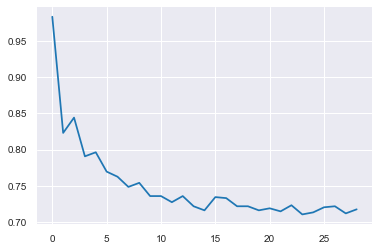

In [130]:
%matplotlib inline
sns.set_style('darkgrid', {'legend.frameon':True})

# Création des dataFrames utiles pour prédire Survived
X = X_train.copy() 
y = y_train.copy() 

score = []
best_k = 1
best_score = 0
from sklearn.neighbors import KNeighborsClassifier
for k in range(best_k, 30):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(X, y)
    score.append(modelKNN.score(X,y))
    if best_score < modelKNN.score(X,y):
        best_k = k
        best_score = modelKNN.score(X,y) 
print('Le meilleur nombre de voisins est de ',best_k)
plt.plot(score)

# Application du meilleur modele sur le fichier train
modelKNN = KNeighborsClassifier(n_neighbors=best_k)
modelKNN.fit(X,y)
print("Le score obtenu sur le test est de:", modelKNN.score(X,y))

#### Test 3: Avec une régression logistique

In [131]:
%matplotlib inline
sns.set_style('darkgrid', {'legend.frameon':True})

# Création des dataFrames utiles pour prédire Survived
X = X_train.copy()
y = y_train.copy()

#Train the model
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(solver='lbfgs',multi_class='auto',penalty='none')
modelLR.fit(X, y) #Training the model

#Test the model
y_pred = modelLR.predict(X_train)

# evaluation du modele
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred)) 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       424
           1       0.76      0.72      0.74       288

    accuracy                           0.79       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712

0.7935393258426966
[[358  66]
 [ 81 207]]


#### Test 4: Avec une régression logistique

In [140]:
valid_test = pd.DataFrame(X_test, columns = train.columns)
valid_test['predicted'] = logreg.predict(X_test)

THRESHOLD = 0.5
preds = np.where(logreg.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

[0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1]


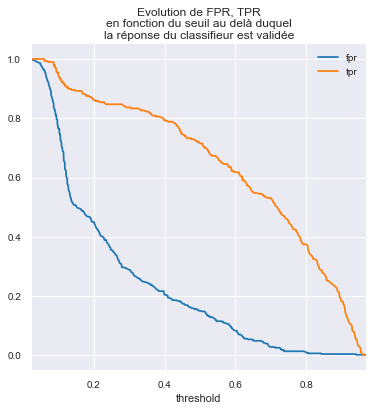

In [133]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = logreg.predict_proba(X_train)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_train, proba, pos_label=logreg.classes_[1], drop_intermediate=False)

tp = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1, threshold=thresholds1))
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée");

In [135]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = logreg.predict_proba(X_train)[:, 0]
fpr0, tpr0, thresholds0 = roc_curve(y_train, proba, pos_label=logreg.classes_[0], drop_intermediate=False)
thresholds0.shape

(660,)

0.8501989976415094


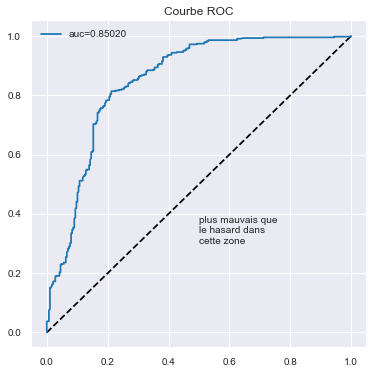

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
print(aucf)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend()

In [137]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_train, logreg.predict(X_train)), columns=['Survived', 'Not Survived'])
cm.index = ['Survived', 'Not Survived']
cm

,Survived,Not Survived
Survived,361,63
Not Survived,82,206


# PREDICTIONS ON TEST FILE

#### Mise en application du modèle 1

In [156]:
def g1(x):
    y_test_prob = np.where(logreg.predict_proba(X_test)[:,1] > x, 1, 0)
    print(y_test_prob)
widgets.interact(g1, x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))



interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.g1(x)>

#### Mise en application du modèle 2

In [152]:
y_test_pred = modelKNN.predict(X_test)
print(y_test_pred)

[0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1
 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0
 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0]


#### Mise en application du modèle 3

In [153]:
y_test_pred = modelLR.predict(X_test);y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

#### Mise en application du modèle 4

In [144]:
def g2(x):
    preds = np.where(logreg.predict_proba(X_test)[:,1] > x, 1, 0)
    print(preds)
widgets.interact(g2, x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.g(x)>

In [ ]:
####